## Q1

epoch 1
b0 = 0.00010083186816217129, b1= 0.030216123525763965, b2= -0.00494461640307856, predictied =  0.5326092266829751, actual = 1, error = 0.46739077331702494
epoch 2
b0 = -0.0006195379982870898, b1= 0.05516721967839513, b2= -0.011607233707765166, predictied =  0.5762223923843012, actual = 1, error = 0.4237776076156988
epoch 3
b0 = -0.0020143313484636167, b1= 0.0756437170108106, b2= -0.019633413506943403, predictied =  0.6088091340016331, actual = 1, error = 0.39119086599836694
epoch 4
b0 = -0.0039286672088010306, b1= 0.09257220828154551, b2= -0.028677162356443013, predictied =  0.632795920768989, actual = 1, error = 0.36720407923101095
epoch 5
b0 = -0.006231094865398651, b1= 0.10676709833993013, b2= -0.03845298446175096, predictied =  0.6503928956726465, actual = 1, error = 0.34960710432735354
epoch 6
b0 = -0.008818857114530431, b1= 0.11887408413140504, b2= -0.048740212693155927, predictied =  0.6633140667583491, actual = 1, error = 0.33668593324165086
epoch 7
b0 = -0.011613984122

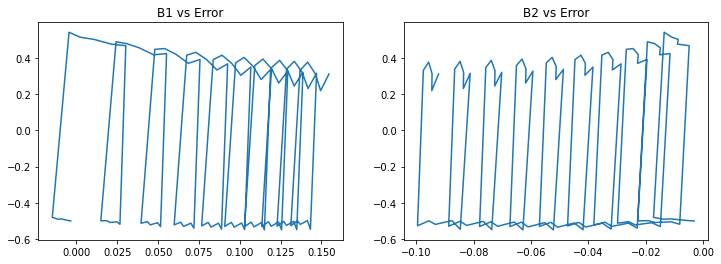

In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

data = pd.read_csv("ques1.csv")
data
# accuracy = (correct predictions / num predictions made) * 100
b0 = 0
b1 = 0
b2 = 0
alpha = 0.01
num_iterations = 10
correct_count = 0
correct_count2 = 0

x1 = data['X1']
x2 = data['X2']
y = data['Y']

def ret01(pred):
    if pred >= 0.5:
        return 1
    else:
        return 0

def pred(x1, x2, b0, b1, b2):
    predi = 1 / (1 + math.exp(-(b0 + b1 * x1 + b2 * x2)))
    return predi

b_0=[]
b_1=[]
b_2=[]
errors = []
for iteration in range(num_iterations):
    print(f"epoch {iteration+1}")
    for i in range(len(x1)):
        prediction = pred(x1[i], x2[i], b0, b1, b2)
        error = y[i] - prediction
        errors.append(error)
        b0 = b0 + alpha * (error) * prediction * (1 - prediction) * 1
        b1 = b1 + alpha * (error) * prediction * (1 - prediction) * x1[i]
        b2 = b2 + alpha * (error) * prediction * (1 - prediction) * x2[i]
        b_0.append(b0)
        b_1.append(b1)
        b_2.append(b2) 
    print(f"b0 = {b0}, b1= {b1}, b2= {b2}, predictied =  {prediction}, actual = {y[i]}, error = {error}")
    

print(f'final = {b0}, {b1}, {b2}')

predictions = []
for i in range(len(data)):
    predict_y = b0+b1*x1[i]+b2*x2[i]
    final_y = ret01(predict_y)
    predictions.append(final_y)

for i in range(len(y)):
    if y[i] == predictions[i]:
        correct_count += 1

    
accuracy = (correct_count / 10) * 100
print(accuracy)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(b_1,errors)
plt.title('B1 vs Error')
plt.subplot(122)
plt.plot(b_2,errors)
plt.title('B2 vs Error')
plt.show()

Instance 1: X1=2.781084, X2=2.550537, Actual Y=0, Predicted Probability=0.10224981257427178
Instance 2: X1=1.465489, X2=2.362125, Actual Y=0, Predicted Probability=0.02502684032438536
Instance 3: X1=3.396562, X2=4.400294, Actual Y=0, Predicted Probability=0.10850275313408717
Instance 4: X1=1.38807, X2=1.85022, Actual Y=0, Predicted Probability=0.027362648385509714
Instance 5: X1=3.064072, X2=3.005306, Actual Y=0, Predicted Probability=0.11917297565982603
Instance 6: X1=7.627531, X2=2.759262, Actual Y=1, Predicted Probability=0.970407230498633
Instance 7: X1=5.332441, X2=2.088627, Actual Y=1, Predicted Probability=0.7336636387683155
Instance 8: X1=6.922597, X2=1.771064, Actual Y=1, Predicted Probability=0.9530001344329782
Instance 9: X1=8.675419, X2=-0.24207, Actual Y=1, Predicted Probability=0.9969974711350023
Instance 10: X1=7.673756, X2=3.508563, Actual Y=1, Predicted Probability=0.9636184093379092


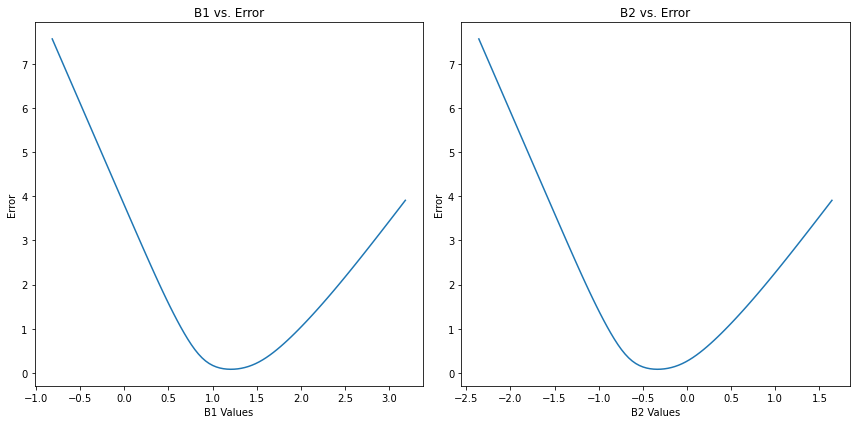

In [3]:
X = data.iloc[:, :-1].values  # Independent variables X1 and X2
y = data.iloc[:, -1].values   # Dependent variable Y
model = LogisticRegression()
model.fit(X, y)

# a. Calculate the coefficients (B0, B1, and B2)
B0 = model.intercept_[0]
B1, B2 = model.coef_[0]

# b. Apply the sigmoid function to get the prediction and calculate error
y_pred_prob = model.predict_proba(X)[:, 1]  # Probability of class 1
error = log_loss(y, y_pred_prob)

# c. Calculate accuracy
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

# d. List the model parameters along with error for every instance of the training data
for i in range(len(X)):
    instance = X[i]
    prediction = y_pred_prob[i]
    actual = y[i]
    print(f"Instance {i + 1}: X1={instance[0]}, X2={instance[1]}, Actual Y={actual}, Predicted Probability={prediction}")

# e. Plot the graph of B1 vs. error and B2 vs. error
B1_values = np.linspace(B1 - 2, B1 + 2, 100)
B2_values = np.linspace(B2 - 2, B2 + 2, 100)

errors_B1 = []
errors_B2 = []

for b1, b2 in zip(B1_values, B2_values):
    model.coef_ = np.array([[b1, b2]])
    y_pred_prob = model.predict_proba(X)[:, 1]
    error = log_loss(y, y_pred_prob)
    errors_B1.append(error)
    errors_B2.append(error)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(B1_values, errors_B1)
plt.xlabel('B1 Values')
plt.ylabel('Error')
plt.title('B1 vs. Error')

plt.subplot(1, 2, 2)
plt.plot(B2_values, errors_B2)
plt.xlabel('B2 Values')
plt.ylabel('Error')
plt.title('B2 vs. Error')

plt.tight_layout()
plt.show()


## Q2

In [4]:

b0_new= 0
b1_new = 0

b_0_new=[]
b_1_new=[]

errors_new = []
print(f"b0:{b0_new}, b1:{b1_new}")

for iteration in range(2):
    
    print(f"epoch {iteration+1}")
    
    for i in range(len(x1)):
        prediction = pred(x1[i], b0, b1)
        
        error = y[i] - prediction
        errors_new.append(error)
        
        b0_new = b0_new + alpha * (error) * prediction * (1 - prediction) * 1
        b1_new = b1_new + alpha * (error) * prediction * (1 - prediction) * x1[i]
        
        b_0_new.append(b0_new)
        b_1_new.append(b1_new)
       
    print(f"b0 = {b0_new}, b1= {b1_new}, predictied =  {prediction}, actual = {y[i]}, error = {error}")
    

print(f'final = {b0_new}, {b1_new}')

predictions = []
for i in range(len(data)):
    predicted_y = b0_new+b1_new*x1[i]
    finals_y = ret01(predicted_y)
    predictions.append(finals_y)
print(predictions)
    
for i in range(len(y)):
    if y[i] == predictions[i]:
        correct_count2 += 1

    
accuracy = (correct_count / 10) * 100
print(accuracy)


plt.plot(b_1,errors_new)
plt.title('B1 vs Error')



b0:0, b1:0
epoch 1


TypeError: pred() missing 2 required positional arguments: 'b1' and 'b2'